# Supervised Learning

TL;DR
Given data $X$, find a function $f$ which maps $X$ on to $y$:

$$f: X -> y$$


Supervised learning is a type of machine learning where the goal is to learn a mapping from input data $X$ to an output $y$. Given a dataset of input-output pairs, the objective is to find a function $f$ that best maps each input $X$ to its corresponding output $y$. This function $f$ can then be used to predict the output for new, unseen inputs.

- Key Concepts:
    - Training Data: A set of input-output pair ($X$, $y$) used to train the model. The input $X$ can be a single feature or a set of features, and $y$ is the corresponding target value.
    - Function $f$: The model or algorithm that maps inputs to outputs $y$. This function is learned from the training data.
    - Prediction: Once the function $f$ is learned, it can be used to predict the output $\hat{y}$ for new input data.

- Types of Supervised Learning:
    - Regression: When the target variable $y$ is continuous. For example, predicting house prices based on features like size and location.
    - Classification: When the target variable $y$ is categorical. For example, classifying emails as spam or not spam.

- Example:
    - Regression: Given a dataset of house prices with features such as size, number of bedrooms, and location, supervised learning can be used to predict the price of a house based on these features. The function $f$ would map the features (input $X$) to the price (output $y$).

    - Classification: Given a dataset of emails labeled as "spam" or "not spam," supervised learning can be used to classify new emails. The function $f$ would map the email features (input $X$) to the categories "spam" or "not spam" (output $y$).

- Process of Supervised Learning:
    - Data Collection: Gather a dataset with input-output pairs.
    - Data Preprocessing: Clean and prepare the data for training.
    - Model Selection: Choose an appropriate algorithm to learn the mapping function $f$.
    - Training: Use the training data to learn the function $f$.
    - Evaluation: Assess the model's performance using a separate set of data (validation or test data).
    - Prediction: Use the trained model to make predictions on new data.

Supervised learning is widely used in various applications, such as image recognition, natural language processing, and predictive analytics, due to its effectiveness in learning from labeled data and making accurate predictions.

## Linear Regression

In [ ]:
import os

os.getcwd()

In [ ]:
import io
import requests

import pandas as pd
from sklearn.linear_model import LinearRegression


# url="https://online.stat.psu.edu/stat462/sites/onlinecourses.science.psu.edu.stat462/files/data/skincancer/index.txt"
# r = requests.get(url, allow_redirects=True)
# with open('index.txt', 'wb') as f:
#     f.write(r.content)
    
df = pd.read_csv('index.txt', delim_whitespace=True)

In [ ]:
df.head(5)

In [ ]:
model = LinearRegression()

In [ ]:
LinearRegression?

In [ ]:
X = df[['Lat']]
y = df['Mort']

model.fit(X, y)

In [ ]:
mort_pred = model.predict(X)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(df['Lat'], df['Mort'], label='observation')
ax.scatter(df['Lat'], mort_pred, label='fit')

ax.set_xlabel('Lat')
ax.set_ylabel('Mort')

ax.legend()

### Metrics:

#### Mean Squared Error (MSE)

MSE measures the average squared difference between the observed actual outcomes (true values) and the predictions made by the model. It gives an idea of how well the model's predictions approximate the actual data points. A lower MSE indicates a better fit.

- Formula:
$$\text{MSE} = \frac{1}{n}\sum^{n}_{i=1}(y_i-\hat{y}_i)^2$$

where:
<ul style="padding-left: 40px;">
    <li>$n$ is the number of observations</li>
    <li>$y_i$ is the actual value</li>
    <li>$\hat{y}_i$ the predicted value</li>
</ul>


- Interpretation:
    - Low MSE: Indicates that the model's predictions are close to the actual values.
    - High MSE: Indicates that there is a significant difference between the predicted and actual values, suggesting a poor fit.
    
MSE provides an absolute measure of the average squared difference between actual and predicted values. It is useful for understanding the model's prediction accuracy in terms of error magnitude.

#### $R^2$ Score

The $R^2$ score is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It indicates how well the independent variables explain the variability of the dependent variable.

- Formula:
$$R^2 = 1 - \frac{\sum^{n}_{i=1}(y_i-\hat{y}_i)^2}{\sum^{n}_{i=1}(y_i-\bar{y}_i)^2}$$

where:
<ul style="padding-left: 40px;">
    <li>$y_i$ is the actual value</li>
    <li>$\hat{y}_i$ is the predicted value</li>
    <li>$\bar{y}_i$ is the mean of the actual values</li>
    <li>$\sum^{n}_{i=1}(y_i-\hat{y}_i)^2$ is the sum of squares of residuals</li>
    <li>$\sum^{n}_{i=1}(y_i-\bar{y}_i)^2$ is the total sum of squares</li>
</ul>


- Interpretation:
    - $R^2=1$: The model perfectly predicts the dependent variable.
    - $R^2=0$: The model does not explain any variability in the dependent variable.
    - $R^2<0$: The model performs worse than a horizontal line (mean of actual values), indicating poor predictive ability.
    
$R^2$ Score provides a relative measure of how well the model explains the variance in the dependent variable compared to the mean model (predicting the mean of actual values). It helps understand the goodness-of-fit of the model.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(mort_pred, df['Mort'])

## Logistic Regression

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://files.realpython.com/media/log-reg-1.e32deaa7cbac.png")

In [ ]:
url="https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv"
r = requests.get(url, allow_redirects=True)
with open('heights_weights_genders.csv', 'wb') as f:
    f.write(r.content)

df = pd.read_csv('heights_weights_genders.csv', sep=',')

X = df[['Height', 'Weight']]
y = df['Gender']

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X, y)

In [ ]:
y_pred = model.predict(X)

### Metrics:

#### Confusion Matrix

A confusion matrix is a table used to evaluate the performance of a classification algorithm. It summarizes the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.

||   0   |   1   |
|---|---|---|
|  0   |   TN  |   FP  |
|  1   |   FN  |   TP  |

- True Positives (TP): The number of instances correctly predicted as positive.
- True Negatives (TN): The number of instances correctly predicted as negative.
- False Positives (FP): The number of instances incorrectly predicted as positive (Type I error).
- False Negatives (FN): The number of instances incorrectly predicted as negative (Type II error).

Provides a detailed breakdown of correct and incorrect classifications.

#### Precision
Precision (also called Positive Predictive Value) is the ratio of correctly predicted positive observations to the total predicted positives. It tells us how many of the predicted positive cases were actually positive.

$$\text{Precision}=\frac{TP}{TP+FP}$$

Measures the accuracy of the positive predictions.

#### Recall
Recall (also called Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to the all observations in the actual class. It tells us how many of the actual positive cases were correctly predicted.

$$\text{Recall}=\frac{TP}{TP+FN}$$

Measures the ability to capture all positive instances.

#### F1-Score
The F1-score is the harmonic mean of Precision and Recall. It provides a balance between Precision and Recall, especially useful when the class distribution is imbalanced.

$$\text{F1-Score}=2 * \frac{\text{Precision} * \text{Recall}}{\text{Precision} + \text{Recall}}$$

Balances precision and recall, useful for imbalanced datasets.

#### Accuracy
Accuracy is the ratio of correctly predicted observations to the total observations. It gives an overall effectiveness of the classifier.

$$\text{Accuracy}=\frac{TP+TN}{TP+TN+FP+FN}$$

Overall correctness of the model, but can be misleading for imbalanced datasets.

In [ ]:
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score, confusion_matrix

In [ ]:
import numpy as np

b = model.intercept_[0]
w1, w2 = model.coef_.T
c = -b/w2
m = -w1/w2

xmin, xmax = 50, 80
ymin, ymax = 50, 300
xd = np.array([xmin, xmax])
yd = m*xd + c

fig, ax = plt.subplots()

male = df[df['Gender']=='Male']
female = df[df['Gender']=='Female']

ax.plot(xd, yd, 'k', lw=1, ls='--', label='boundary')
ax.scatter(male['Height'], male['Weight'], c='b', alpha=0.5, label='Male')
ax.scatter(female['Height'], female['Weight'], c='r', alpha=0.5, label='Female')

ax.legend()

## Decision Tree

A Decision Tree is a supervised learning algorithm used for both classification and regression tasks. It works by splitting the data into subsets based on the most significant attributes, creating a tree-like model of decisions. Each internal node of the tree represents a decision based on a feature, each branch represents an outcome of the decision, and each leaf node represents a class label (for classification) or a continuous value (for regression).

- Key Concepts:
    - Root Node: Represents the entire dataset, which is then split into two or more homogeneous sets.
    - Splitting: The process of dividing a node into two or more sub-nodes.
    - Decision Node: When a sub-node splits into further sub-nodes.
    - Leaf/Terminal Node: Nodes that do not split further.
    - Pruning: The process of removing sub-nodes to prevent overfitting.
    - Entropy and Gini Index: Measures to find the best split.

- Steps in Building a Decision Tree:
    - Select the Best Attribute: Use a measure like entropy or Gini index to find the attribute that best separates the dataset.
    - Split the Dataset: Divide the dataset into subsets based on the best attribute.
    - Repeat the Process: Apply the process recursively for each subset until stopping criteria (e.g., maximum depth, minimum samples per leaf) are met.


Example with the Iris Dataset

- Let's use the DecisionTreeClassifier from Scikit-Learn to create a decision tree based on the famous Iris dataset.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X, y)

In [ ]:
# Plot the decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

## Northwest University Homework Assignment

***Lending Club***

Source: https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv

In [18]:
import os
import re
from typing import Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


def load_data() -> Tuple[pd.DataFrame, pd.DataFrame]:

    filename = os.path.join("lending_club", 'train.csv')
    train = pd.read_csv(filename)

    filename = os.path.join("lending_club", 'test.csv')
    test = pd.read_csv(filename)

    return train, test

In [19]:
train, test = load_data()

In [20]:
train.head(5)

,id,money_made_inv,acc_now_delinq,acc_open_past_24mths,addr_state,annual_inc,application_type,avg_cur_bal,bc_util,delinq_2yrs,...,out_prncp_inv,pub_rec,pub_rec_bankruptcies,purpose,sub_grade,term,tot_coll_amt,tot_cur_bal,total_rec_late_fee,verification_status
0,3819,-2787.380000,0,2,CT,21120.0,Individual,3662,86.1,0,...,3828.54,0,0,debt_consolidation,C1,36 months,0,65921,0.0,Verified
1,3820,2.436708,0,3,CA,32400.0,Individual,2973,30.2,0,...,0.00,3,2,debt_consolidation,C1,36 months,0,17840,0.0,Not Verified
2,3821,-3.773192,0,3,NY,30251.0,Individual,1983,46.2,0,...,0.00,0,0,debt_consolidation,B5,36 months,0,19829,0.0,Source Verified
3,3822,-7951.970000,0,1,NJ,66976.0,Individual,1638,77.4,0,...,9665.27,0,0,debt_consolidation,C1,60 months,0,9830,0.0,Source Verified
4,3823,-8058.760000,0,2,MO,125000.0,Individual,577,0.0,0,...,11358.24,0,0,debt_consolidation,A2,60 months,0,6924,0.0,Source Verified


### Goal: predict `money_made_inv` with linear regression

Text(0, 0.5, 'money_made_inv')

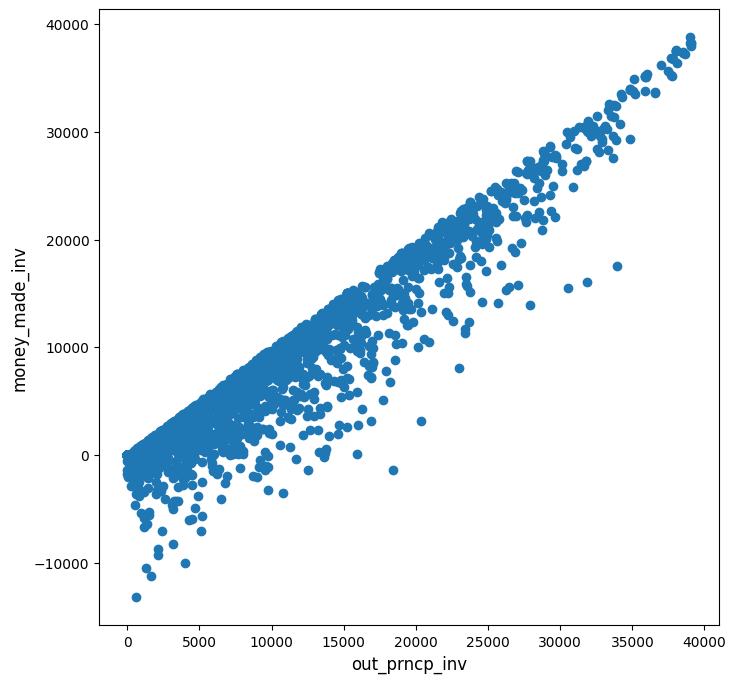

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))


ax.scatter(train['out_prncp_inv'], -train['money_made_inv'])

ax.set_xlabel("out_prncp_inv", fontsize=12)
ax.set_ylabel("money_made_inv", fontsize=12)

$$\text{money\_made\_inv} = a * \text{out\_prncp\_inv} + f(x)$$

Interpretation: How much does money the bank make/receive with the principle (out_prncp_inv). We need to find out $f(x)$.

In [22]:
train.iloc[0]

id                                    3819
money_made_inv                    -2787.38
acc_now_delinq                           0
acc_open_past_24mths                     2
addr_state                              CT
annual_inc                         21120.0
application_type                Individual
avg_cur_bal                           3662
bc_util                               86.1
delinq_2yrs                              0
delinq_amnt                              0
dti                                  33.69
earliest_cr_line                  Sep-2010
emp_length                          1 year
emp_title                   Security Guard
grade                                    C
home_ownership                        RENT
initial_list_status                      w
int_rate                             12.62
last_credit_pull_d                Feb-2019
loan_amnt                             7000
mort_acc                                 0
num_sats                                18
num_tl_120d

### Quantitative Finanace:

A mortgage is essentially a fixed-income security. Once the principal and interest rate are determined, everything else is predictable—you know your monthly payment amount and the total amount paid at any given time.

In [23]:
def monthly_payment(principle, rate, time):
    '''
    https://www.mymove.com/mortgage/mortgage-calculation/
    '''

    exponential_term = np.power(1 + rate, time)

    return principle * rate * exponential_term / (exponential_term - 1)


def remaining_time(monthly_payment, int_rate, out_prncp_inv):

    '''
    https://finance.zacks.com/figure-out-much-left-mortgage-9287.html
    :param monthly_payment:
    :param int_rate:
    :param out_prncp_inv:
    :return:
    '''

    return -np.log(1 - out_prncp_inv * int_rate / monthly_payment) / np.log(1 + int_rate)


def pipeline(df: pd.DataFrame):

    regex = re.compile("[\d]+")

    df['term in months'] = df['term'].apply(lambda x: int(regex.findall(x)[0]))
    df['monthly interest rate'] = df['int_rate'] / 100 / 12

    df['monthly_payment'] = df[['loan_amnt', 'monthly interest rate', 'term in months']].apply(
        lambda x: monthly_payment(x[0], x[1], x[2]), axis=1)

    df['paid_princp_inv'] = df['loan_amnt'] - df['out_prncp_inv']
    df['duration'] =  df[['monthly_payment', 'monthly interest rate', 'paid_princp_inv']].apply(
        lambda x: remaining_time(x[0], x[1], x[2]), axis=1)

    df['remaining time'] = df[['monthly_payment', 'monthly interest rate', 'out_prncp_inv']].apply(
        lambda x: remaining_time(x[0], x[1], x[2]), axis=1)

    # Simple will be paid
    df.loc[~np.isinf(df['remaining time']), 'will be paid'] = df.loc[~np.isinf(
        df['remaining time']), 'remaining time'] * df.loc[~np.isinf(
        df['remaining time']), 'monthly_payment']

    df['will be paid'].fillna(0, inplace=True)

    # adjusted with interest rate
    df['remaining time to end'] = df['term in months'] - df['duration']
    return df

In [24]:
X_train, X_val = train_test_split(train, test_size=0.2, random_state=0)


X_train = pipeline(X_train)
X_val = pipeline(X_val)

C:\Users\MengChieh\AppData\Local\Temp\ipykernel_3812\4083106280.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x: monthly_payment(x[0], x[1], x[2]), axis=1)
C:\Users\MengChieh\AppData\Local\Temp\ipykernel_3812\4083106280.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x: remaining_time(x[0], x[1], x[2]), axis=1)
C:\Users\MengChieh\AppData\Local\Temp\ipykernel_3812\4083106280.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, us

In [25]:
X = X_train[['out_prncp_inv', 'int_rate', 'monthly_payment', 'remaining time', 'remaining time to end']]
y = X_train['money_made_inv'].reset_index(drop=True)

poly = PolynomialFeatures(2, interaction_only=False, include_bias=False)
X = poly.fit_transform(X)
X = pd.DataFrame(data=X, columns = poly.get_feature_names_out())

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         money_made_inv   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          5.158e+04
Date:                Thu, 06 Mar 2025   Prob (F-statistic):                        0.00
Time:                        14:43:14   Log-Likelihood:                         -35274.
No. Observations:                4622   AIC:                                  7.059e+04
Df Residuals:                    4602   BIC:                                  7.072e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
out_prncp_inv                            -1.1867      0.025    -47.125      0.000      -1.236      -1.137
int_rate                                  8.5352      4.242      2.012      0.044       0.220      16.851
monthly_payment                          -0.2482      0.119     -2.092      0.037      -0.481      -0.016
remaining time                         -268.8798     22.497    -11.952      0.000    -312.985    -224.774
remaining time to end                   238.3746     20.219     11.790      0.000     198.735     278.014
out_prncp_inv^2                        7.091e-07   8.12e-07      0.873      0.382   -8.82e-07     2.3e-06
out_prncp_inv int_rate                   -0.0080      0.001    -10.004      0.000      -0.010      -0.006
out_prncp_inv monthly_payment          -4.82e-05   2.34e-05     -2.058      0.040   -9.41e-05   -2.28e-06
out_prncp_inv remaining time              0.0492      0.002     23.048      0.000       0.045       0.053
out_prncp_inv remaining time to end      -0.0489      0.002    -25.277      0.000      -0.053      -0.045
int_rate^2                               -0.3510      0.211     -1.667      0.096      -0.764       0.062
int_rate monthly_payment                  0.0019      0.006      0.300      0.764      -0.011       0.015
int_rate remaining time                   3.2096      1.109      2.895      0.004       1.036       5.383
int_rate remaining time to end           -3.2278      1.008     -3.201      0.001      -5.205      -1.251
monthly_payment^2                         0.0004      0.000      3.591      0.000       0.000       0.001
monthly_payment remaining time           -2.1857      0.055    -39.942      0.000      -2.293      -2.078
monthly_payment remaining time to end     2.4306      0.047     52.051      0.000       2.339       2.522
remaining time^2                        -22.3318      1.384    -16.139      0.000     -25.045     -19.619
remaining time remaining time to end     42.3145      2.478     17.075      0.000      37.456      47.173
remaining time to end^2                 -19.7151      1.193    -16.523      0.000     -22.054     -17.376
==============================================================================
Omnibus:                     5147.493   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4210199.782
Skew:                           4.845   Prob(JB):                         0.00
Kurtosis:                     150.539   Cond. No.                     8.61e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the mode

In [26]:
X = X_val[['out_prncp_inv', 'int_rate', 'monthly_payment', 'remaining time', 'remaining time to end']]
y = X_val['money_made_inv'].reset_index(drop=True)

X = poly.transform(X)
X = pd.DataFrame(data=X, columns = poly.get_feature_names_out())

predictions = model.predict(X) 

In [27]:
np.sqrt(mean_squared_error(y, predictions))

402.76392944417404

## Collinearity

from the summary we can see that there is a potential colliearity `remaining time` vs `remaining time to end`

This suggests that the time difference between the actual loan time and the planned loan time (36 months/60 months) can have impact on the money_made_inv

In [28]:
X_train['t_diff'] = X_train['remaining time']-X_train['remaining time to end']

X = X_train[['out_prncp_inv', 'int_rate', 'monthly_payment', 't_diff']]
y = X_train['money_made_inv'].reset_index(drop=True)

poly = PolynomialFeatures(2, interaction_only=False, include_bias=False)
X = poly.fit_transform(X)
X = pd.DataFrame(data=X, columns = poly.get_feature_names_out())

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         money_made_inv   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          6.821e+04
Date:                Thu, 06 Mar 2025   Prob (F-statistic):                        0.00
Time:                        14:45:37   Log-Likelihood:                         -35455.
No. Observations:                4622   AIC:                                  7.094e+04
Df Residuals:                    4608   BIC:                                  7.103e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
out_prncp_inv                    -1.0205      0.006   -181.991      0.000      -1.032      -1.010
int_rate                        -12.1839      3.986     -3.057      0.002     -19.998      -4.370
monthly_payment                   0.2108      0.111      1.901      0.057      -0.007       0.428
t_diff                         -241.0182     13.972    -17.250      0.000    -268.410    -213.626
out_prncp_inv^2                3.883e-06   1.99e-07     19.518      0.000    3.49e-06    4.27e-06
out_prncp_inv int_rate           -0.0008      0.000     -2.593      0.010      -0.001      -0.000
out_prncp_inv monthly_payment    -0.0001   7.28e-06    -14.595      0.000      -0.000    -9.2e-05
out_prncp_inv t_diff              0.0397      0.001     46.487      0.000       0.038       0.041
int_rate^2                        0.5434      0.202      2.694      0.007       0.148       0.939
int_rate monthly_payment         -0.0141      0.006     -2.275      0.023      -0.026      -0.002
int_rate t_diff                   4.5731      0.916      4.992      0.000       2.777       6.369
monthly_payment^2                 0.0003   9.83e-05      2.811      0.005    8.36e-05       0.000
monthly_payment t_diff           -2.2743      0.026    -88.358      0.000      -2.325      -2.224
t_diff^2                        -16.3072      1.162    -14.036      0.000     -18.585     -14.029
==============================================================================
Omnibus:                     5114.720   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3581567.194
Skew:                           4.836   Prob(JB):                         0.00
Kurtosis:                     139.029   Cond. No.                     3.88e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.88e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
X_val['t_diff'] = X_val['remaining time']-X_val['remaining time to end']

X = X_val[['out_prncp_inv', 'int_rate', 'monthly_payment', 't_diff']]
y = X_val['money_made_inv'].reset_index(drop=True)

X = poly.transform(X)
X = pd.DataFrame(data=X, columns = poly.get_feature_names_out())

predictions = model.predict(X)

np.sqrt(mean_squared_error(y, predictions))

419.9693078361795

The RMSE increases, so maybe the collinearity assumption is not correct. Roll back.

We can try to remove terms that have high pvalues.

In [30]:
model.params

out_prncp_inv                     -1.020519
int_rate                         -12.183918
monthly_payment                    0.210752
t_diff                          -241.018204
out_prncp_inv^2                    0.000004
out_prncp_inv int_rate            -0.000848
out_prncp_inv monthly_payment     -0.000106
out_prncp_inv t_diff               0.039680
int_rate^2                         0.543403
int_rate monthly_payment          -0.014124
int_rate t_diff                    4.573150
monthly_payment^2                  0.000276
monthly_payment t_diff            -2.274306
t_diff^2                         -16.307153
dtype: float64

In [31]:
model.pvalues

out_prncp_inv                    0.000000e+00
int_rate                         2.249904e-03
monthly_payment                  5.734820e-02
t_diff                           1.159378e-64
out_prncp_inv^2                  1.401729e-81
out_prncp_inv int_rate           9.540854e-03
out_prncp_inv monthly_payment    3.374189e-47
out_prncp_inv t_diff             0.000000e+00
int_rate^2                       7.095453e-03
int_rate monthly_payment         2.292323e-02
int_rate t_diff                  6.185065e-07
monthly_payment^2                4.959248e-03
monthly_payment t_diff           0.000000e+00
t_diff^2                         7.465467e-44
dtype: float64

In [32]:
X = X_train[['out_prncp_inv', 'int_rate', 'monthly_payment', 'remaining time', 'remaining time to end']]
y = X_train['money_made_inv'].reset_index(drop=True)

poly = PolynomialFeatures(2, interaction_only=False, include_bias=False)
X = poly.fit_transform(X)
X = pd.DataFrame(data=X, columns = poly.get_feature_names_out())

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         money_made_inv   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          5.158e+04
Date:                Thu, 06 Mar 2025   Prob (F-statistic):                        0.00
Time:                        14:46:59   Log-Likelihood:                         -35274.
No. Observations:                4622   AIC:                                  7.059e+04
Df Residuals:                    4602   BIC:                                  7.072e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
out_prncp_inv                            -1.1867      0.025    -47.125      0.000      -1.236      -1.137
int_rate                                  8.5352      4.242      2.012      0.044       0.220      16.851
monthly_payment                          -0.2482      0.119     -2.092      0.037      -0.481      -0.016
remaining time                         -268.8798     22.497    -11.952      0.000    -312.985    -224.774
remaining time to end                   238.3746     20.219     11.790      0.000     198.735     278.014
out_prncp_inv^2                        7.091e-07   8.12e-07      0.873      0.382   -8.82e-07     2.3e-06
out_prncp_inv int_rate                   -0.0080      0.001    -10.004      0.000      -0.010      -0.006
out_prncp_inv monthly_payment          -4.82e-05   2.34e-05     -2.058      0.040   -9.41e-05   -2.28e-06
out_prncp_inv remaining time              0.0492      0.002     23.048      0.000       0.045       0.053
out_prncp_inv remaining time to end      -0.0489      0.002    -25.277      0.000      -0.053      -0.045
int_rate^2                               -0.3510      0.211     -1.667      0.096      -0.764       0.062
int_rate monthly_payment                  0.0019      0.006      0.300      0.764      -0.011       0.015
int_rate remaining time                   3.2096      1.109      2.895      0.004       1.036       5.383
int_rate remaining time to end           -3.2278      1.008     -3.201      0.001      -5.205      -1.251
monthly_payment^2                         0.0004      0.000      3.591      0.000       0.000       0.001
monthly_payment remaining time           -2.1857      0.055    -39.942      0.000      -2.293      -2.078
monthly_payment remaining time to end     2.4306      0.047     52.051      0.000       2.339       2.522
remaining time^2                        -22.3318      1.384    -16.139      0.000     -25.045     -19.619
remaining time remaining time to end     42.3145      2.478     17.075      0.000      37.456      47.173
remaining time to end^2                 -19.7151      1.193    -16.523      0.000     -22.054     -17.376
==============================================================================
Omnibus:                     5147.493   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4210199.782
Skew:                           4.845   Prob(JB):                         0.00
Kurtosis:                     150.539   Cond. No.                     8.61e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the mode

In [33]:
cutoff = 0.025

dropped_columns = []

for column, pvalue in model.pvalues.to_dict().items():
    if pvalue > cutoff:
        dropped_columns.append(column)

print(dropped_columns)

['int_rate', 'monthly_payment', 'out_prncp_inv^2', 'out_prncp_inv monthly_payment', 'int_rate^2', 'int_rate monthly_payment']


In [34]:
model = sm.OLS(y, X.drop(labels=dropped_columns, axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         money_made_inv   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          7.348e+04
Date:                Thu, 06 Mar 2025   Prob (F-statistic):                        0.00
Time:                        14:47:42   Log-Likelihood:                         -35284.
No. Observations:                4622   AIC:                                  7.060e+04
Df Residuals:                    4608   BIC:                                  7.069e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
out_prncp_inv                            -1.2153      0.024    -51.397      0.000      -1.262      -1.169
remaining time                         -272.1760     21.967    -12.390      0.000    -315.242    -229.110
remaining time to end                   251.0808     19.517     12.865      0.000     212.818     289.344
out_prncp_inv int_rate                   -0.0077      0.001    -11.223      0.000      -0.009      -0.006
out_prncp_inv remaining time              0.0498      0.002     24.210      0.000       0.046       0.054
out_prncp_inv remaining time to end      -0.0487      0.002    -25.486      0.000      -0.052      -0.045
int_rate remaining time                   3.9851      1.077      3.698      0.000       1.873       6.097
int_rate remaining time to end           -4.0205      0.959     -4.190      0.000      -5.902      -2.139
monthly_payment^2                         0.0002   2.28e-05      7.544      0.000       0.000       0.000
monthly_payment remaining time           -2.2147      0.054    -41.376      0.000      -2.320      -2.110
monthly_payment remaining time to end     2.4315      0.046     52.822      0.000       2.341       2.522
remaining time^2                        -22.1915      1.380    -16.082      0.000     -24.897     -19.486
remaining time remaining time to end     41.8476      2.442     17.135      0.000      37.060      46.635
remaining time to end^2                 -19.4875      1.174    -16.601      0.000     -21.789     -17.186
==============================================================================
Omnibus:                     5165.817   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4234899.024
Skew:                           4.879   Prob(JB):                         0.00
Kurtosis:                     150.969   Cond. No.                     2.35e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
X = X_val[['out_prncp_inv', 'int_rate', 'monthly_payment', 'remaining time', 'remaining time to end']]
y = X_val['money_made_inv'].reset_index(drop=True)

X = poly.transform(X)
X = pd.DataFrame(data=X, columns = poly.get_feature_names_out())

predictions = model.predict(X.drop(labels=dropped_columns, axis=1))

np.sqrt(mean_squared_error(y, predictions))

402.7588266664069

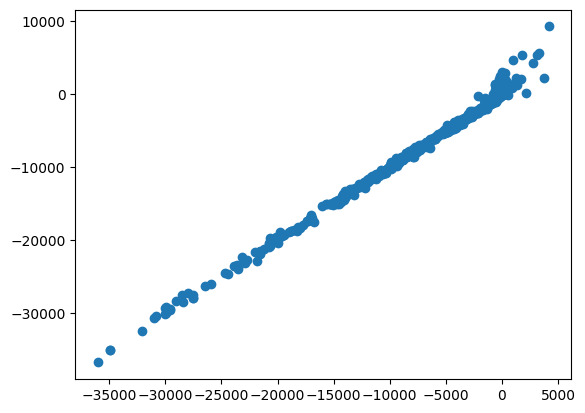

In [36]:
fig, ax = plt.subplots()

ax.scatter(predictions, y)

Strange tail...

Add to order 3

In [37]:
X = X_train[['out_prncp_inv', 'int_rate', 'monthly_payment', 'remaining time', 'remaining time to end']]
y = X_train['money_made_inv'].reset_index(drop=True)

poly = PolynomialFeatures(3, interaction_only=False, include_bias=False)
X = poly.fit_transform(X)
X = pd.DataFrame(data=X, columns = poly.get_feature_names_out())

model = sm.OLS(y, X).fit()

cutoff = 0.025

dropped_columns = []

for column, pvalue in model.pvalues.to_dict().items():
    if pvalue > cutoff:
        dropped_columns.append(column)
        
model = sm.OLS(y, X.drop(labels=dropped_columns, axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         money_made_inv   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          5.259e+04
Date:                Thu, 06 Mar 2025   Prob (F-statistic):                        0.00
Time:                        14:49:10   Log-Likelihood:                         -33804.
No. Observations:                4622   AIC:                                  6.768e+04
Df Residuals:                    4585   BIC:                                  6.792e+04
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
remaining time                                        -779.3771     86.920     -8.967      0.000    -949.781    -608.973
remaining time to end                                  697.2395     72.464      9.622      0.000     555.174     839.305
out_prncp_inv int_rate                                  -0.2095      0.010    -21.555      0.000      -0.229      -0.190
out_prncp_inv remaining time                            -0.1161      0.020     -5.792      0.000      -0.155      -0.077
out_prncp_inv remaining time to end                      0.2357      0.022     10.555      0.000       0.192       0.279
monthly_payment^2                                    -4.356e-06   6.32e-05     -0.069      0.945      -0.000       0.000
monthly_payment remaining time                          -5.3490      0.306    -17.500      0.000      -5.948      -4.750
monthly_payment remaining time to end                    4.5905      0.255     17.994      0.000       4.090       5.091
remaining time^2                                       -43.9222      7.444     -5.900      0.000     -58.516     -29.328
remaining time remaining time to end                   125.7752     12.851      9.787      0.000     100.580     150.970
remaining time to end^2                                -77.4802      6.032    -12.845      0.000     -89.306     -65.655
out_prncp_inv^2 remaining time                       -6.458e-06   4.87e-07    -13.265      0.000   -7.41e-06    -5.5e-06
out_prncp_inv^2 remaining time to end                 6.189e-06   4.65e-07     13.314      0.000    5.28e-06     7.1e-06
out_prncp_inv int_rate^2                                -0.0015      0.000     -9.928      0.000      -0.002      -0.001
out_prncp_inv int_rate remaining time to end             0.0058      0.000     27.511      0.000       0.005       0.006
out_prncp_inv monthly_payment remaining time             0.0003   2.09e-05     12.337      0.000       0.000       0.000
out_prncp_inv monthly_payment remaining time to end     -0.0002    1.9e-05    -13.082      0.000      -0.000      -0.000
out_prncp_inv remaining time^2                           0.0130      0.001     21.019      0.000       0.012       0.014
out_prncp_inv remaining time remaining time to end      -0.0215      0.001    -21.821      0.000      -0.023      -0.020
out_prncp_inv remaining time to end^2                    0.0089      0.000     19.202      0.000       0.008       0.010
int_rate^2 remaining time                               -0.7577      0.144     -5.256      0.000      -1.040      -0.475
int_rate^2 remaining time to end                         0.6819      0.130      

In [38]:
X = X_val[['out_prncp_inv', 'int_rate', 'monthly_payment', 'remaining time', 'remaining time to end']]
y = X_val['money_made_inv'].reset_index(drop=True)

X = poly.transform(X)
X = pd.DataFrame(data=X, columns = poly.get_feature_names_out())

predictions = model.predict(X.drop(labels=dropped_columns, axis=1))

np.sqrt(mean_squared_error(y, predictions))

335.73261339790616

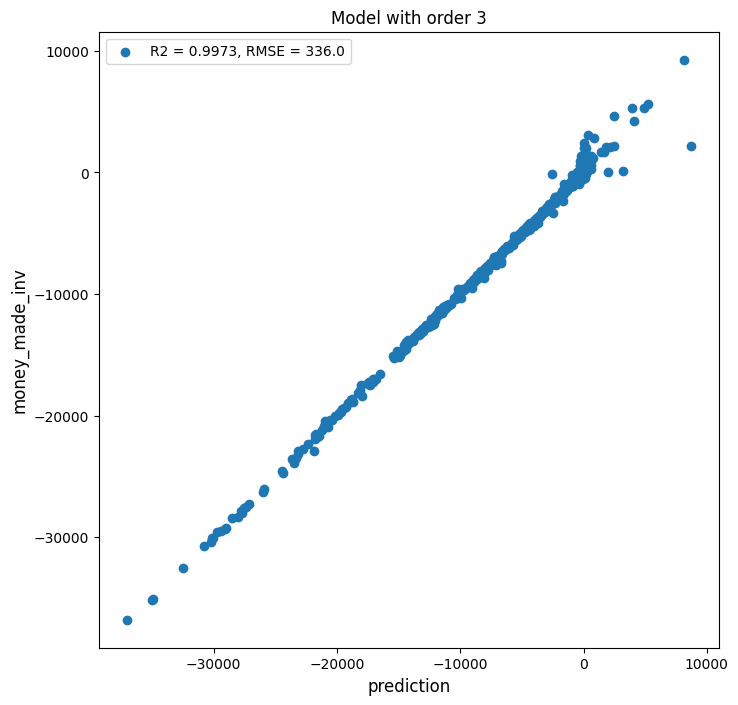

In [39]:
from sklearn.metrics import r2_score

r2 = np.round(r2_score(y, predictions), 4)
rmse = np.round(np.sqrt(mean_squared_error(y, predictions)))

fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(predictions, y, label=f"R2 = {r2}, RMSE = {rmse}")

ax.set_ylabel('money_made_inv', fontsize=12)
ax.set_xlabel("prediction", fontsize=12)
ax.set_title("Model with order 3")

plt.legend()